In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("lending_data.csv")
lending_df = pd.read_csv(file_path)

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Check out size of the dataframe
lending_df.shape

(77536, 8)

In [4]:
# Separate the data into labels and features.
X = lending_df.copy()

# Separate the y variable, the labels
y = lending_df["loan_status"]

# Separate the X variable, the features
X.drop("loan_status", axis=1, inplace=True)

In [5]:
# Review the y variable Series. (0=low_risk, 1=high_risk)
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [7]:
# Review the y variable DataFrame
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

In [9]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Retain feature names

# Transform the testing data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Retain feature names

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [11]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=1, max_iter=200)

# Train the model using the scaled data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [12]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

In [13]:
# Check the shape of y_pred to ensure it matches X_test
print(y_pred_lr.shape)
print(X_test_scaled.shape)

(19384,)
(19384, 7)


In [15]:
# Check the first few rows of X_test to confirm the column names
X_test_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,1.333831,1.321707,1.322157,1.536208,1.140849,1.043347,1.322157
1,-0.003813,-0.004920,-0.003793,0.157025,0.090351,-0.672899,-0.003793
2,0.521690,0.535849,0.533754,0.784873,0.615600,1.043347,0.533754
3,0.426144,0.418926,0.414299,0.654618,0.615600,1.043347,0.414299
4,0.043960,0.067033,0.067880,0.247294,0.090351,-0.672899,0.067880


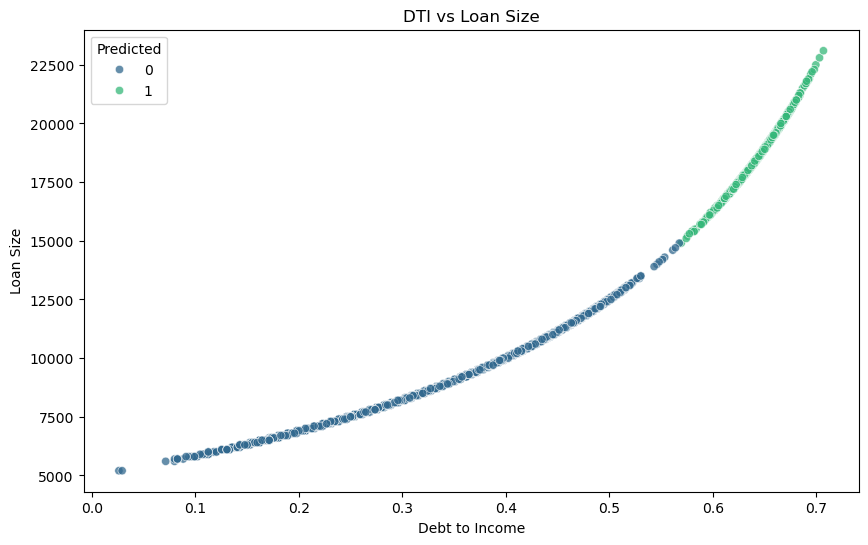

In [16]:
# Use the two features for visualization purposes
X_test_viz = X_test[['debt_to_income', 'loan_size']]
y_test_viz = y_test

# Create a DataFrame for the visualization
viz_df = pd.DataFrame(data=X_test_viz, columns=['debt_to_income', 'loan_size'])
viz_df['Predicted'] = y_pred_lr

# Plot the scatter plot with a sample of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=viz_df, x='debt_to_income', y='loan_size', hue='Predicted', palette='viridis', alpha=0.75)

# Add a title and labels
plt.title('DTI vs Loan Size')
plt.xlabel('Debt to Income')
plt.ylabel('Loan Size')

# Save a copy
plt.savefig('dti_loan_size.png')

# Show the plot
plt.show()

## Debt to Income (DTI) and Loan Size: 
* From the graph, we observe that as the debt-to-income ratio (DTI) increases, loan amounts tend to increase as well. Notably, all of the higher risk loans have a DTI greater than 60%, which is considered very high. Additionally, the lower end for loan amounts is around the $15,000 mark. This pattern aligns closely with real-world personal loan risk assessment practices. Higher loan amounts are often sought by borrowers with significant debt burdens, who aim to consolidate their debt and lock in fixed rates to manage high revolving debt interest rates.

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Generate a confusion matrix for the model
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[18652,   113],
       [    9,   610]], dtype=int64)

## Confusion Matrix: 
* 18,652 Low_Risk loans correctly indentified, 99.95%.
* 113 High_Risk loans incorrectly identified, 15.63%.
* 9 Low_Risk loans incorrectly identified, 0.05%.
* 610 High_Risk loans correctly identified, 84.37%.


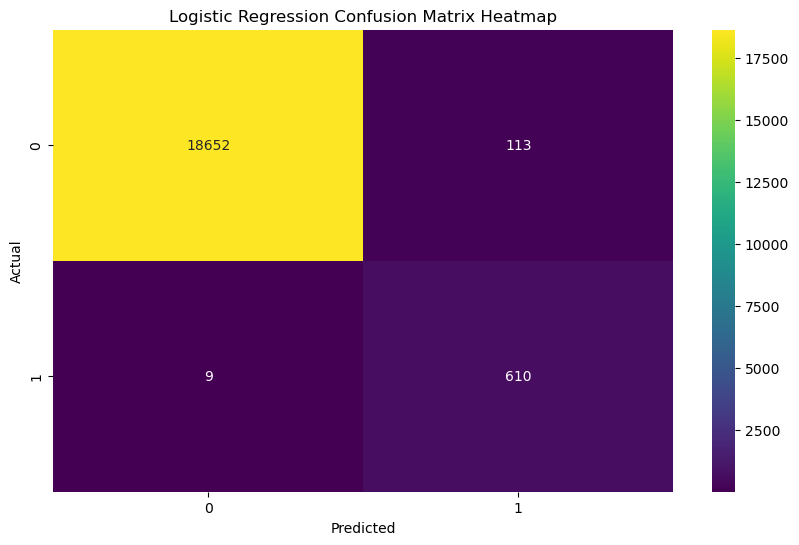

In [20]:
# Create a heatmap of the lr confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix Heatmap')

# Save the heatmap image
plt.savefig('lr_cm.png')

# Show the heatmap
plt.show()

In [18]:
# Print the classification report for the model
target_names = ["Low_Risk", "High_Risk"]
class_report = classification_report(y_test, y_pred_lr, target_names=target_names)
print(class_report)

              precision    recall  f1-score   support

    Low_Risk       1.00      0.99      1.00     18765
   High_Risk       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The total accuracy of the model is 99.26%. Low-risk loans are highly predictable based on their features, and the majority of the loans in the dataset are low risk. Given the class imbalance, with a significantly larger number of low-risk loans compared to high-risk loans, these findings are very strong.

However, determining the features of high-risk loans can be more challenging for a seasoned loan underwriter. Default risk cannot typically be assessed based on a single criterion. Multiple features need to be considered, and significant risk offsets should be present to help mitigate. A reason why there are less high risk loans in the dataset is that the majority of high risk loan applications do not get approved.

# Random Forest Classifer Model 2

## Use the loaded DataFrame and the `train_test_split` completed from above.


In [21]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [22]:
# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Generate a confusion matrix for the model
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[18664,   101],
       [   57,   562]], dtype=int64)

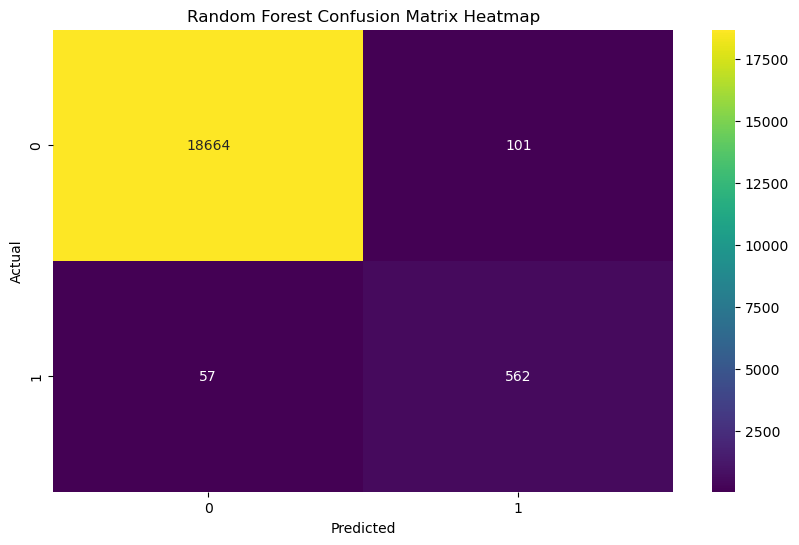

In [25]:
# Create a heatmap of the rf confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix Heatmap')

# Save the heatmap image
plt.savefig('rf_cm.png')

# Show the heatmap
plt.show()

## Confusion Matrix: 
* 18,664 Low_Risk loans correctly indentified, 99.70%.
* 101 High_Risk loans incorrectly identified, 15.23%.
* 57 Low_Risk loans incorrectly identified, 0.30%.
* 562 High_Risk loans correctly identified, 84.77%.

In [24]:
# Print the classification report for the model
target_names = ["Low_Risk", "High_Risk"]
cr_rf = classification_report(y_test, y_pred_rf, target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

    Low_Risk       1.00      0.99      1.00     18765
   High_Risk       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### How did the Random Forest compare the the Logistic Regression?
* The high risk loans performed slightly better but it is minimal as 84.37% of high risk loans identified in the lr_model vs 84.77% in the rf_model however the low risk incorrect classifying went from only 0.05% incorrect to 0.30% incorrect so although a small percentage overall it is 6 times greater. 